In [23]:
import numpy
import matplotlib
from scipy import signal
import scipy.fftpack
import pandas as pd
from pylab import *
import matplotlib.pyplot as plt 
from matplotlib import rc
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator, NullFormatter
%matplotlib inline

In [24]:
# детрендинг методом скользящего среднего. degree - полуокно усреднения
def detrendS(data,degree=10):
    detrended=[0.]*degree # заполняем нулями
    for i in range(degree,len(data)-degree):
        chunk=data[i-degree:i+degree]
        chunk=sum(chunk)/len(chunk)
        detrended.append(data[i]-chunk)
    return detrended+[0.]*degree

In [25]:
# координаты максимумов функции
def maxcoor(s):
    u_x =array([0]) # do not add 0
    u_y = array([0])
    q_u = np.zeros(s.shape)
    for k in range(0,len(s)-1):
        if (np.sign(s[k]-s[k-1])==1) and (np.sign(s[k]-s[k+1])==1):
            u_x=append(u_x,float(k))
            u_y=append(u_y,s[k])
    
    return u_x,u_y

In [26]:
# определение ф-ции Морле (real)
def morleyRE(t):
    m=real(exp(1j*pi*t)*exp(-t**2/(8.*sigma**2)))
    return m

In [27]:
# определение ф-ции Морле (Imag)
def morleyIM(t):
    m=imag(exp(1j*pi*t)*exp(-t**2/(8.*sigma**2)))
    return m

### main part

In [28]:
data=np.loadtxt('Winter_2009.txt',skiprows=1)

In [29]:

foF2=data[:,1]

#print fof2

In [30]:
N=len(foF2)


In [31]:
# detrending by window smoothing

dw=5 # semiwindow size
foF2sl=detrendS(foF2,dw)
print(len(foF2sl))

90


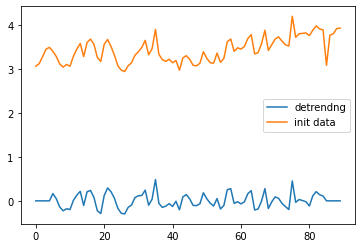

In [32]:
plot(foF2sl,label='detrendng')
plot(foF2,label='init data')
legend()

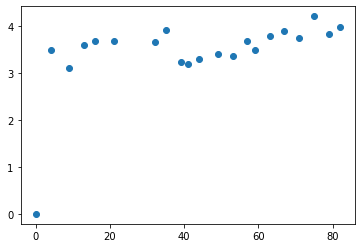

In [33]:
max_x,max_y=maxcoor(foF2)
#plot(max_x,max_y,'r.',label='init data')
scatter(max_x,max_y)
#legend()


In [34]:
# параметр sigma
sigma=0.7

In [35]:
N2=int(N/6)
print(N2)
W=zeros(N2*N).reshape(N2,N)
Wim=zeros(N2*N).reshape(N2,N)
a=arange(1,N2+1)
b=arange(N)
t=arange(N)

15


### transform coordinat system (сжимаем/растягиваем шкалу времени

In [36]:
ty=t/float(N)*10.
by=b/float(N)*10.
ay=a/float(N)*10.
dt=ty[1]-ty[0]

In [37]:
# real of Morley-wavelet part
for i in range(0,N2):
    #print(i)
    for jb in range(0,N):
        #print(jb)
        sum1=0.
        for k in range(0,N):
            sum1=sum1+foF2sl[k]*morleyRE((ty[k]-by[jb])/ay[i])*dt
        W[i,jb]=sum1/sqrt(ay[i])


In [38]:
# imagenary of Morley-wavelet part
for i in range(0,N2):
    #print(i)
    for jb in range(0,N):
        #print(jb)
        sum1=0.
        for k in range(0,N):
            sum1=sum1+foF2sl[k]*morleyIM((ty[k]-by[jb])/ay[i])*dt
        Wim[i,jb]=sum1/sqrt(ay[i])

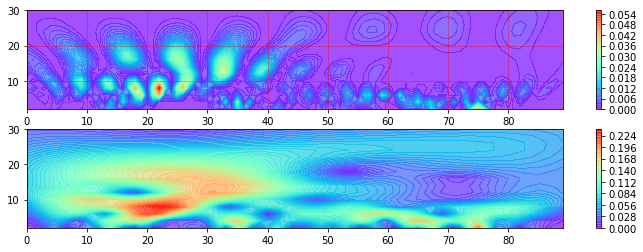

In [39]:
figure(figsize=(12,4))
subplot(2,1,1)
lev=arange(0.2,6.,0.05)
#contourf(b,a*2,W,levels=lev, cmap='RdGy',alpha=0.7)
lev=arange(0.1,14,0.05)
grid(color='r', linestyle='--', linewidth=0.5)
contourf(b,a*2,W**2,60, cmap='rainbow',alpha=0.7)
colorbar()
subplot(2,1,2)
contourf(b,a*2,sqrt(W**2+Wim**2),60, cmap='rainbow',alpha=0.7)
colorbar()

### Ищем точки максимумов вейвлета

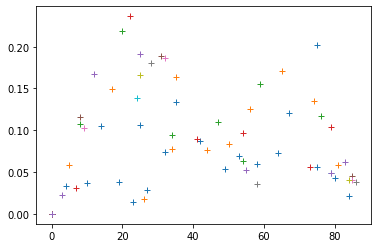

In [49]:
W_max=zeros(N2*N).reshape(N2,N)

for i in range(N2):
    x_max,y_max=maxcoor(sqrt(W[i,:]**2+Wim[i,:]**2))
    plot(x_max,y_max,'+')
    #print(len(x_max),x_max[len(x_max)-1])
    for k in range(len(x_max)):
        kx=int(x_max[k])
        
        W_max[i,kx]=sign(y_max[k])
            #print(i,k)
        
            
    

In [46]:
print(W_max)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


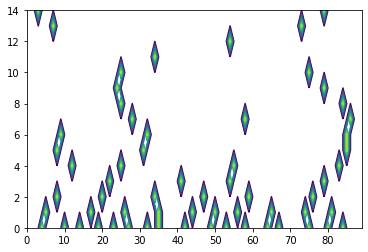

In [47]:
contour(W_max)

### Построение "красивых" графиков

In [43]:
#majorLocator = MultipleLocator(20)
majorFormatter = FormatStrFormatter('%d')
xminorLocator = MultipleLocator(5)
yminorLocator = MultipleLocator(1)
width=arange(0.1,N/4,0.2)
wmatr=signal.cwt(y[:N],signal.ricker,width)
fig, ax = plt.subplots()

#contourf(wmatr)
contourf(wmatr, 40, cmap=cm.rainbow,alpha=0.9)
colorbar(format='%.1f')
ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
xlim(0,85,5)
ylim(0,20,1)
plt.xlabel(u'Временной сдвиг b,день', {'fontname':'Times New Roman'},size=25, color='black') #подпись осей
plt.ylabel(u'Масштаб,a', {'fontname':'Times New Roman'},size=25, color='black')
rcParams['figure.figsize'] = (10, 6) #размер картинки
rcParams['lines.linewidth'] = 2 #ширина линии
rcParams['font.size']= 15 #размер шрифта
rcParams['xtick.major.size'] = 10
rcParams['xtick.major.width'] = 2
rcParams['xtick.minor.size'] = 5
rcParams['xtick.minor.width'] = 1
rcParams['ytick.major.size'] = 10
rcParams['ytick.major.width'] = 2
rcParams['ytick.minor.size'] = 5
rcParams['ytick.minor.width'] = 1
#plt.tight_layout() # автоматическое выравнивание элементов на холсте plt
#savefig('Wavelet_2009.png',dpi=1200)


NameError: name 'y' is not defined